In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

pd.set_option('max_columns', 50)
plt.style.use('bmh')
color_pal=plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle=cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

# Import data and do basic data check

In [2]:
df = pd.read_csv("adult.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,189778.366512,10.080679,1077.648844,87.303830,40.437456
std,13.640433,105549.977697,2.572720,7385.292085,402.960219,12.347429
min,17.000000,12285.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,117827.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,178356.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,237051.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,1484705.000000,16.000000,99999.000000,4356.000000,99.000000


# Exploratory Data Analysis

In [6]:
def count_graph(col, df):
    fig, axs = plt.subplots(int(len(col)/2) if int(len(col)%2)==0 else 1, len(col) if len(col)%2 !=0 else 2,figsize=(20,10))
    axs=axs.flatten() if len(col)!=1 else axs
    
    for i in range(len(col)):
        sns.countplot(x=col[i], data=df, ax= axs[i] if len(col)!=1 else axs).set_title("Count of different categories of "+str(col[i]))

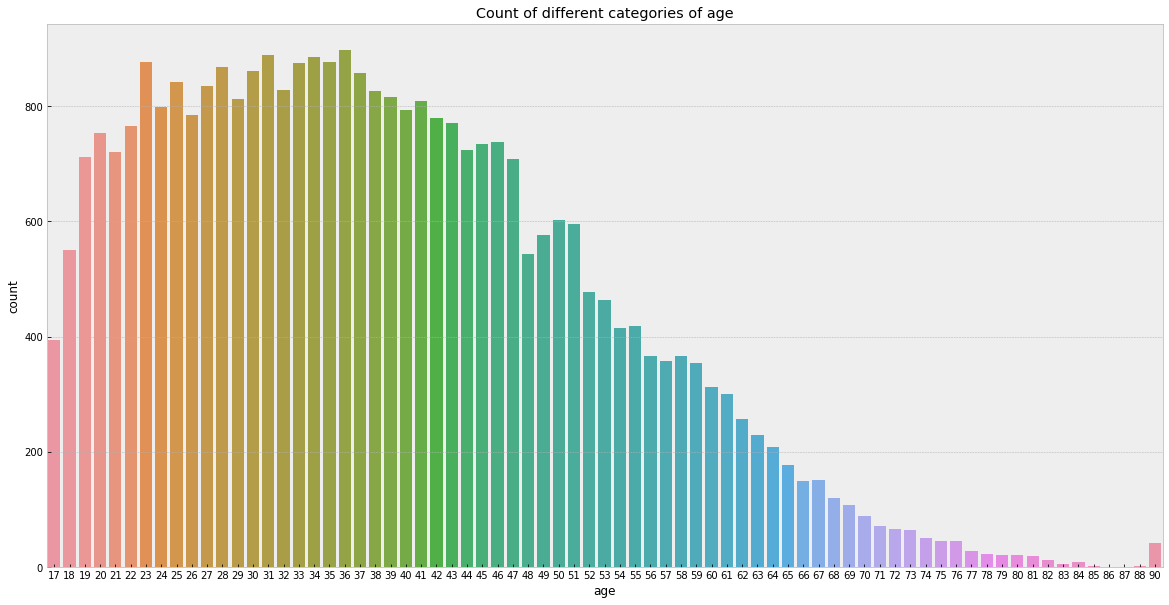

In [7]:
count_graph(["age"], df)

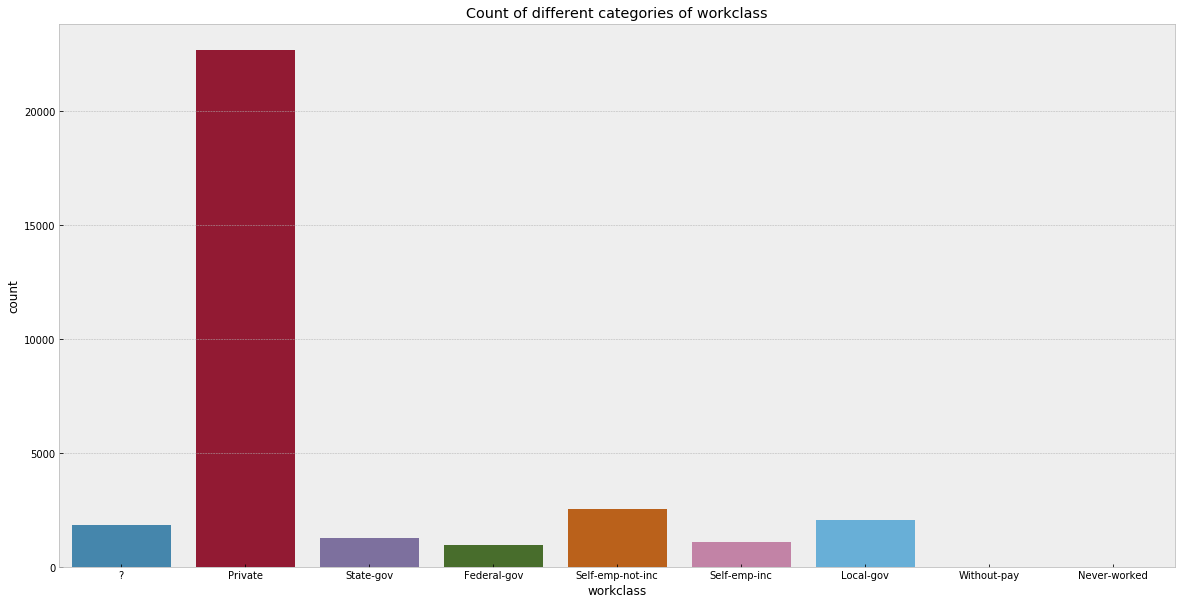

In [8]:
count_graph(["workclass"], df)

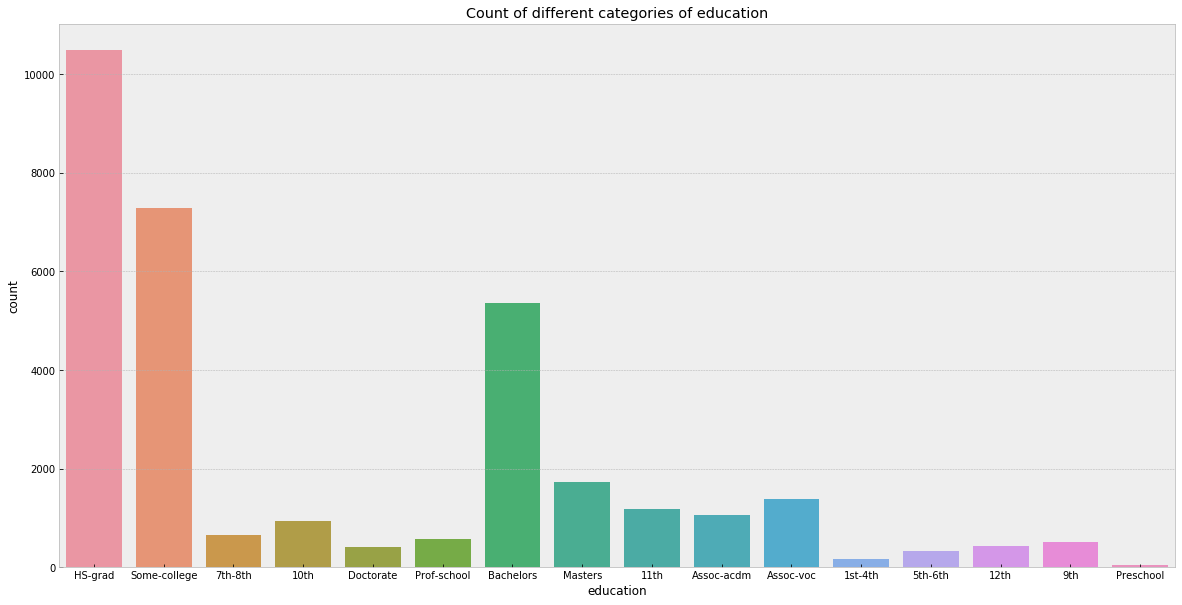

In [9]:
count_graph(["education"], df)

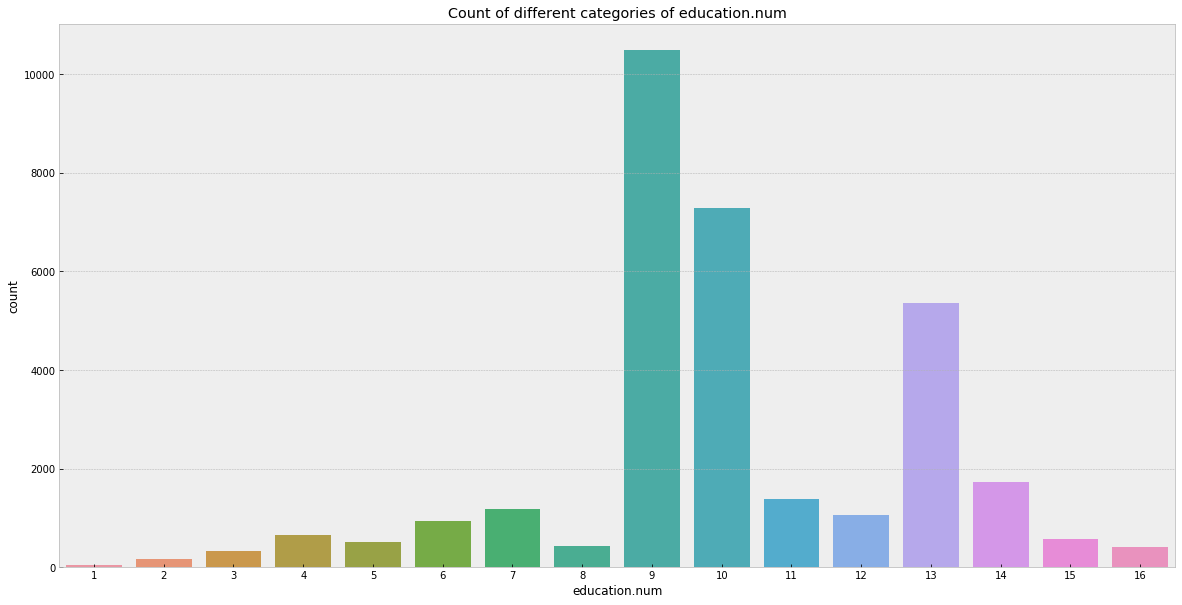

In [10]:
count_graph(["education.num"], df)

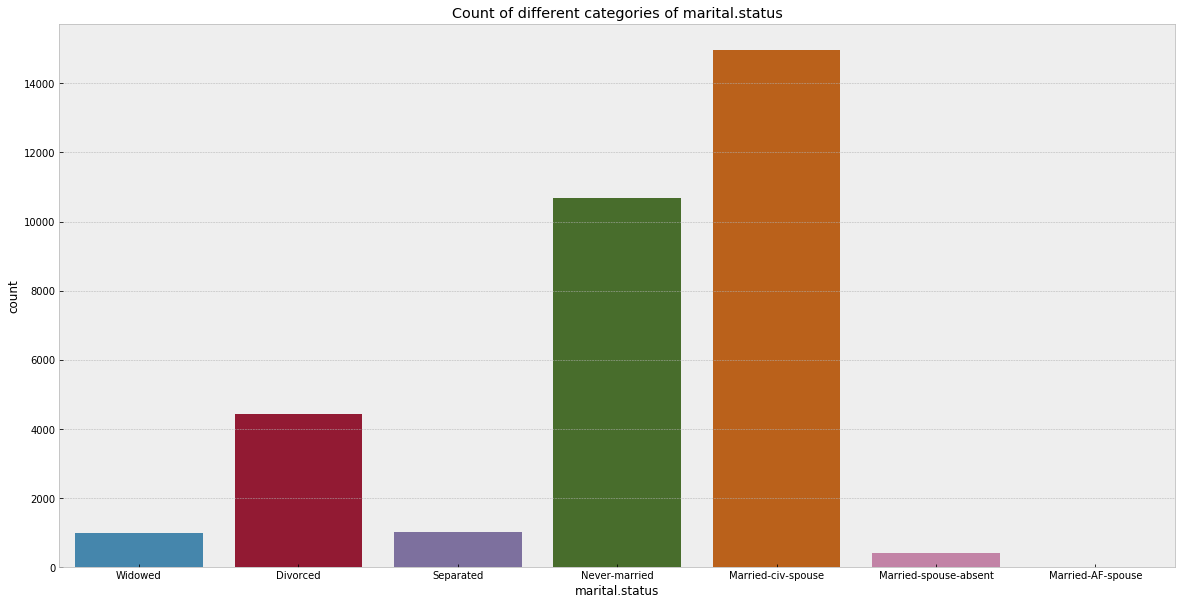

In [11]:
count_graph(["marital.status"], df)

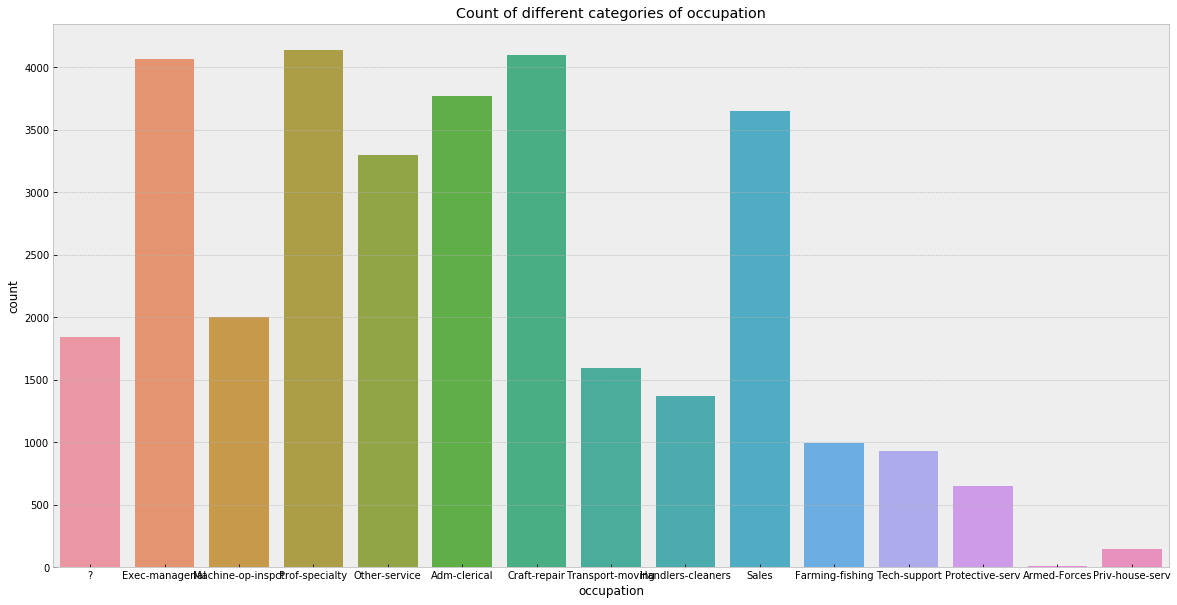

In [12]:
count_graph(["occupation"], df)

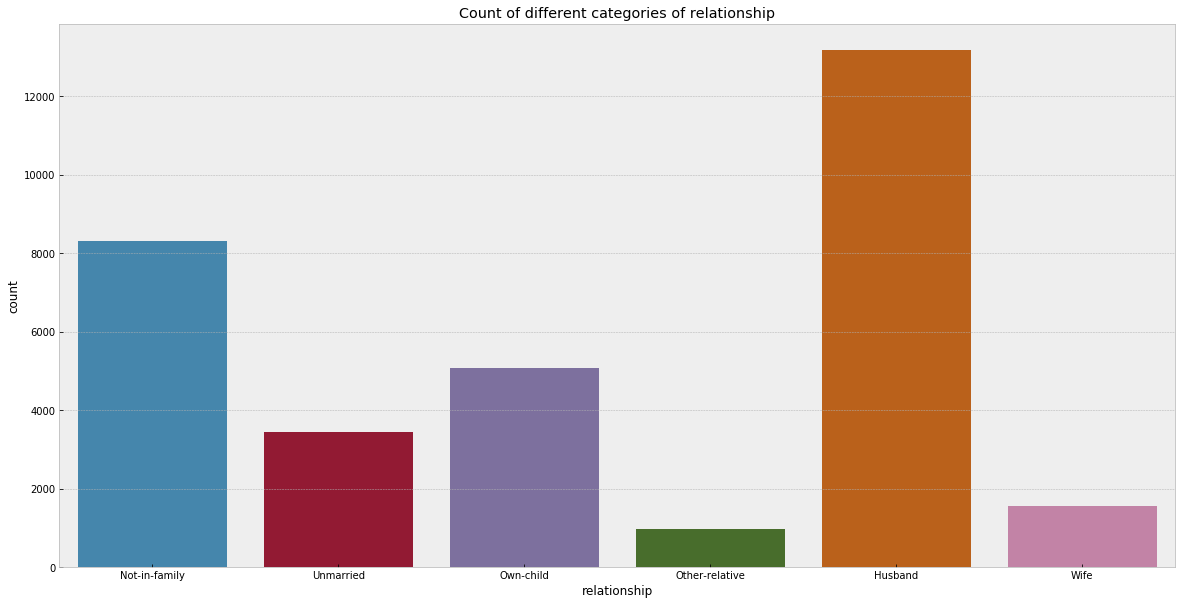

In [13]:
count_graph(["relationship"], df)

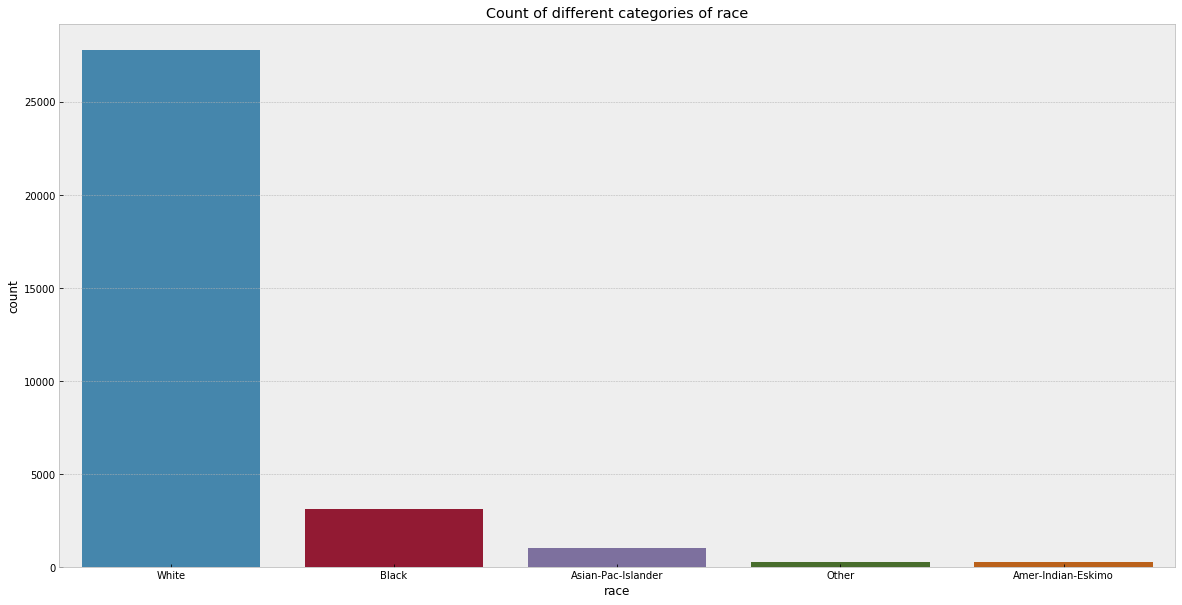

In [14]:
count_graph(["race"], df)

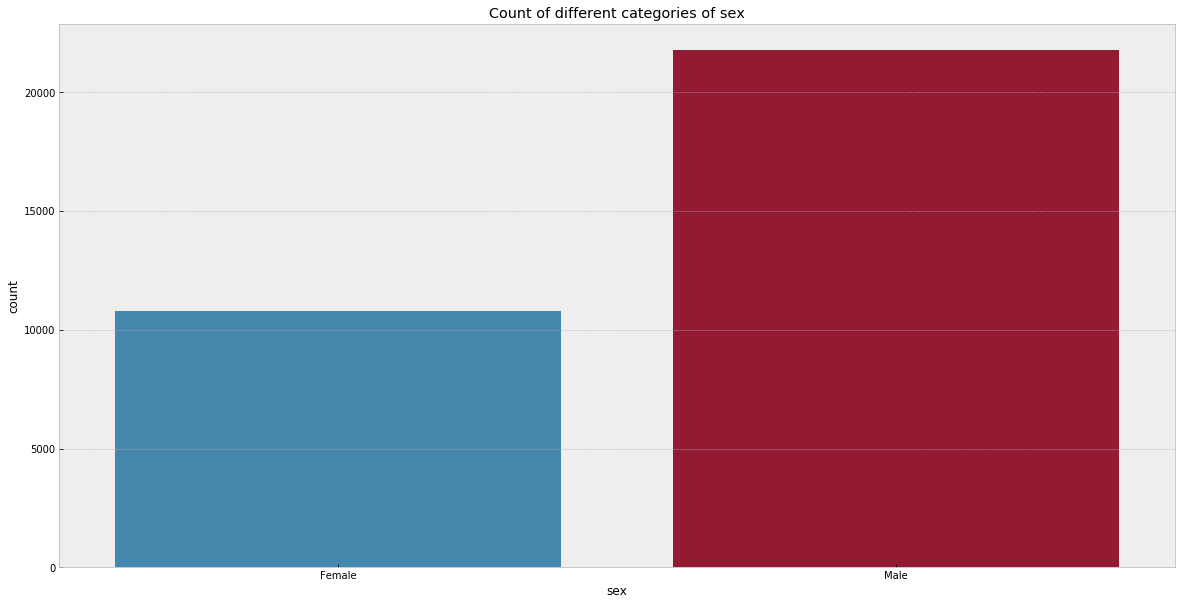

In [15]:
count_graph(["sex"], df)

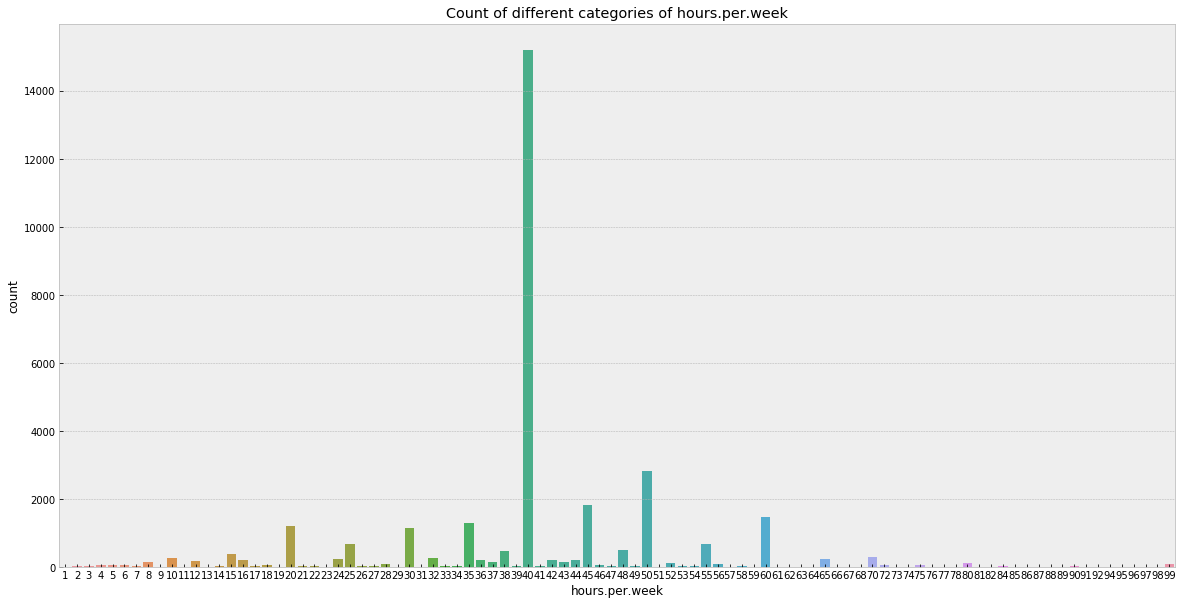

In [16]:
count_graph(["hours.per.week"], df)

In [17]:
df["native.country"].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [18]:
def scatterplot(x,y,data,hue):
    plt.figure(figsize=(15,10))
    sns.scatterplot(x=x, y=y, data=data, hue=hue).set_title(x+" vs "+y)
    plt.show()

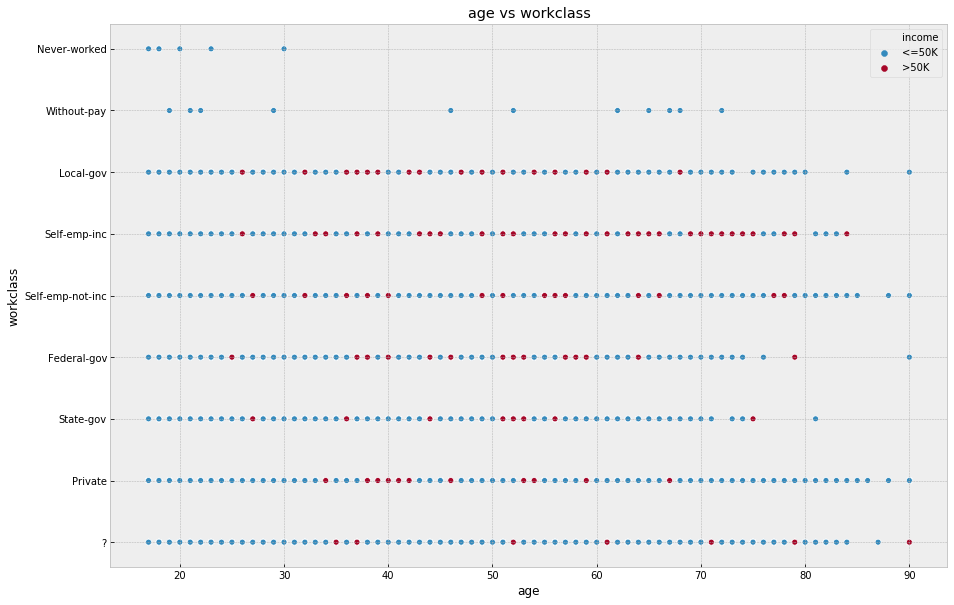

In [19]:
scatterplot(x="age", y="workclass", data=df, hue="income")

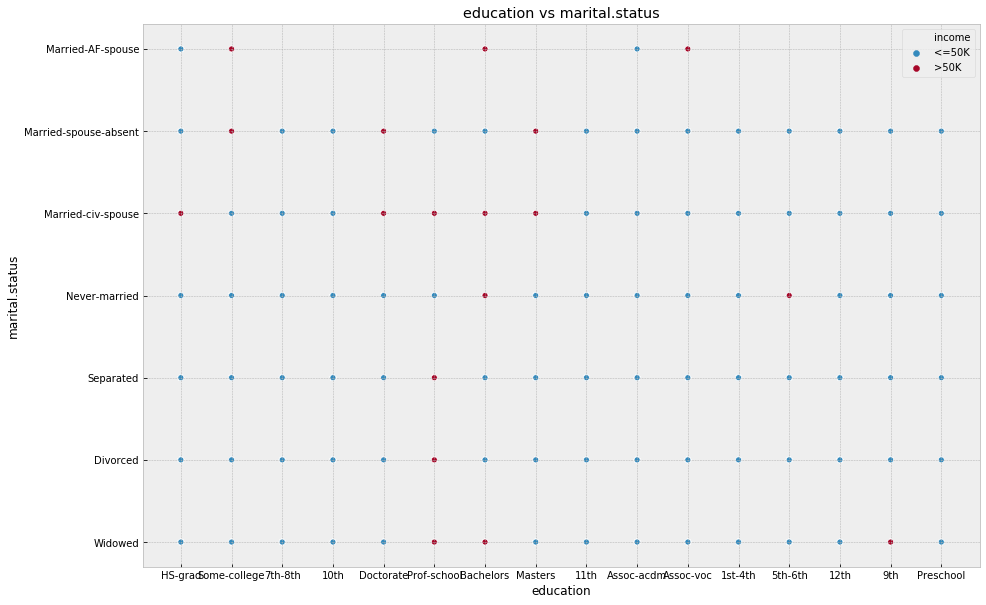

In [20]:
scatterplot(x="education", y="marital.status", data=df, hue="income")

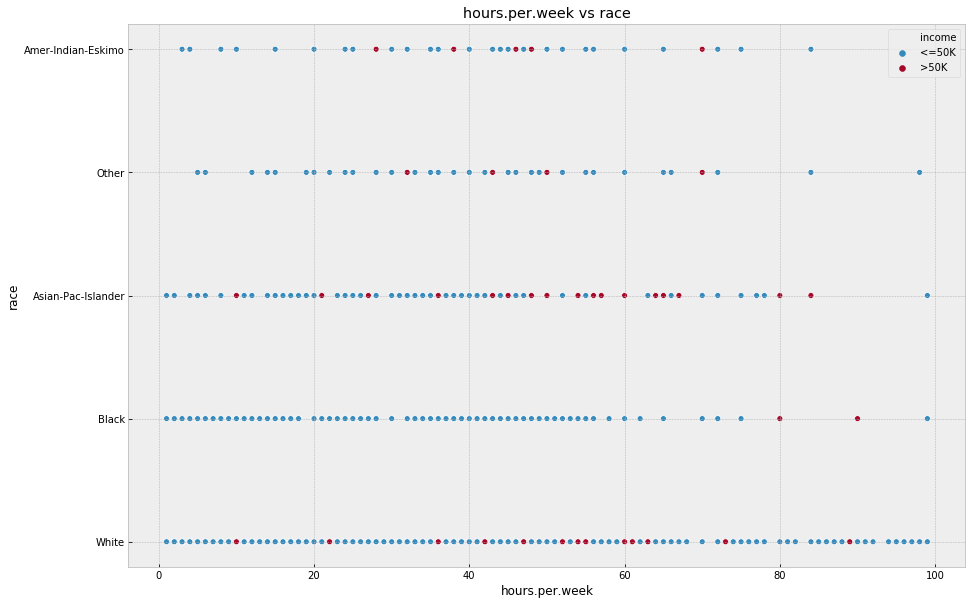

In [21]:
scatterplot(x="hours.per.week", y="race", data=df, hue="income")

###### Asian-Pac_Islander has more income when they get older

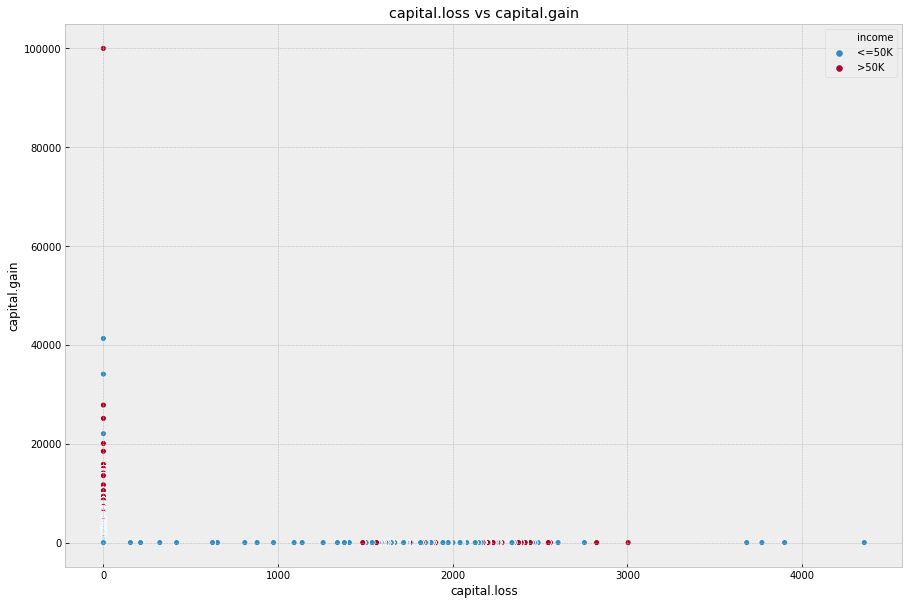

In [22]:
scatterplot(x="capital.loss", y="capital.gain", data=df, hue="income")

###### Capital.loss and capital.gain value seems to be arbitrary at first but through this plot it is obvious that more capital has more income and they will have less capital to loss

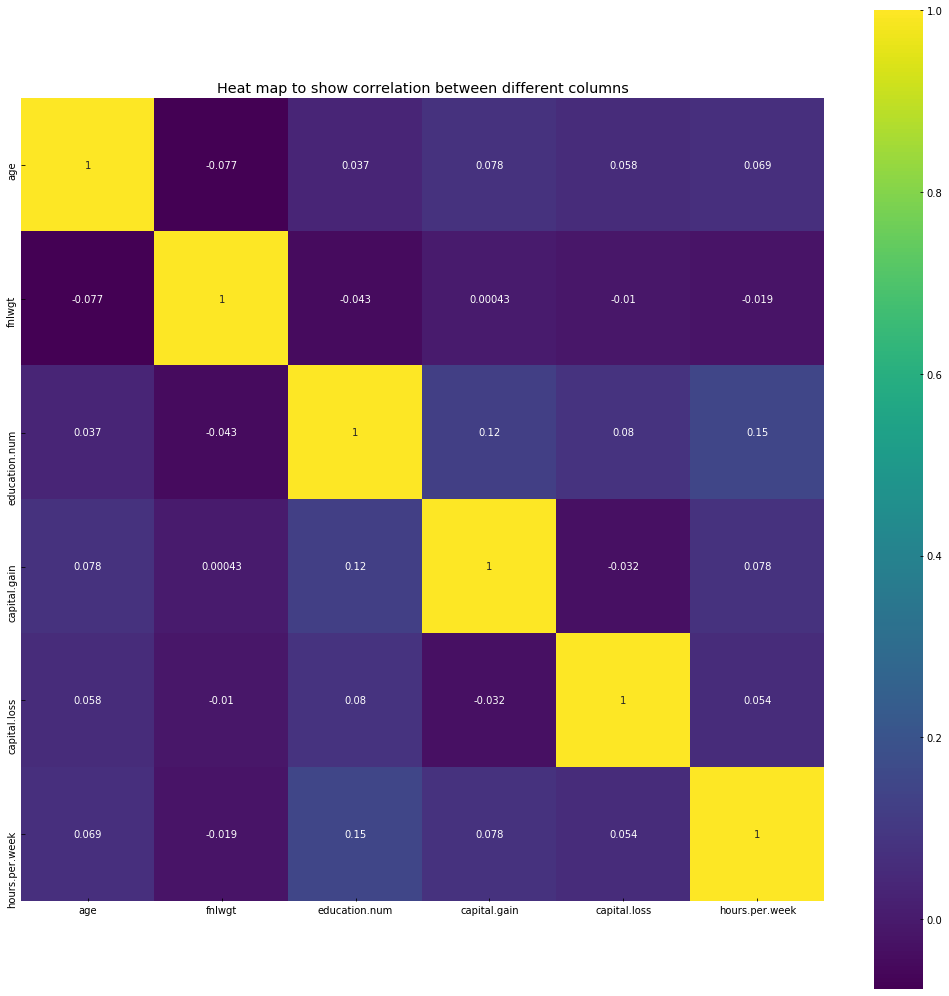

In [23]:
plt.figure(figsize=(18, 18))
sns.heatmap(df.corr(), square=True,annot=True,cmap='viridis').set_title("Heat map to show correlation between different columns")
plt.show()

###### There is no high correlation among different variables as can be seen from the above figure

# Coding

In [24]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


1. Change type of categorical columns from object to category

In [26]:
cat_features=["workclass", "education", "marital.status", "occupation", "relationship", "race", "sex", "native.country", "income"]

In [27]:
for x in cat_features:
    df[x] = df[x].astype("category")

In [28]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null category
fnlwgt            32561 non-null int64
education         32561 non-null category
education.num     32561 non-null int64
marital.status    32561 non-null category
occupation        32561 non-null category
relationship      32561 non-null category
race              32561 non-null category
sex               32561 non-null category
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null category
income            32561 non-null category
dtypes: category(9), int64(6)
memory usage: 1.8 MB


2. Drop columns as they do not have any significance to the income as seen through EDA step

In [29]:
drop_columns=["fnlwgt", "education.num"]

In [30]:
df.drop(drop_columns, axis=1, inplace=True)

In [31]:
df

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,HS-grad,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,Some-college,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


3. Performing one hot encoding for categorical columns. OneHotEncoding is the best alternative in our case as there is no loss of information and we do not have a huge dimensionality problem even after OneHotEncoding

In [32]:
def oneHotEncoding(df, cols):
    for col in cols:
        df = pd.get_dummies(df,prefix=[col], columns = [col])
    return df

In [33]:
final_df = oneHotEncoding(df, ["workclass", "education", "marital.status", "occupation", "relationship", "race", "sex", "native.country"])

In [34]:
final_df

,age,capital.gain,capital.loss,hours.per.week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,...,native.country_Hong,native.country_Hungary,native.country_India,native.country_Iran,native.country_Ireland,native.country_Italy,native.country_Jamaica,native.country_Japan,native.country_Laos,native.country_Mexico,native.country_Nicaragua,native.country_Outlying-US(Guam-USVI-etc),native.country_Peru,native.country_Philippines,native.country_Poland,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,0,4356,40,<=50K,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,82,0,4356,18,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,66,0,4356,40,<=50K,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,54,0,3900,40,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,41,0,3900,40,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,0,0,40,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,27,0,0,38,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32558,40,0,0,40,>50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32559,58,0,0,40,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [35]:
final_df.shape

(32561, 107)

In [36]:
final_df.isna().sum()

age                               0
capital.gain                      0
capital.loss                      0
hours.per.week                    0
income                            0
                                 ..
native.country_Thailand           0
native.country_Trinadad&Tobago    0
native.country_United-States      0
native.country_Vietnam            0
native.country_Yugoslavia         0
Length: 107, dtype: int64

# Feature Selection

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import chi2

In [38]:
# Chi-square test to see which features are most related to choice column
y = final_df["income"]
X = final_df.drop(["income"], axis=1)

fs = SelectKBest(score_func=chi2, k="all")
X_selected = fs.fit_transform(X, y)

Text(0.5, 1.0, 'Log scale value plot of feature importance by chi-squared method')

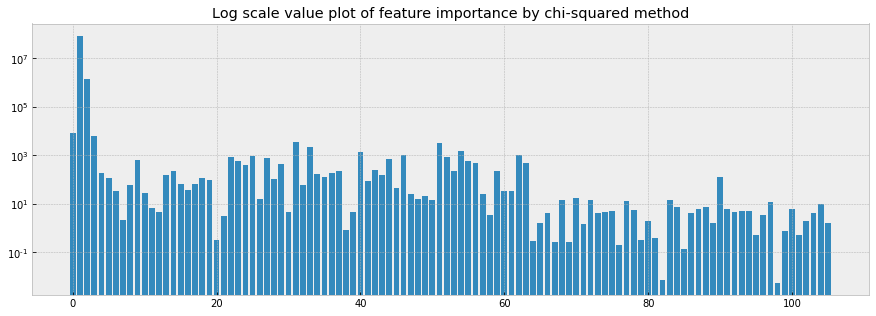

In [39]:
plt.figure(figsize=(15,5))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.yscale("log")
plt.title("Log scale value plot of feature importance by chi-squared method")

###### Plotting log scale values for different feature selection as per chi-square method for classification task. There are only 2 columns which have very small values which can be ignored and kept for the final model

In [40]:
for i in range(len(fs.scores_)):
    print('Feature %s: %f' % (final_df.columns[i], fs.scores_[i]))

Feature age: 8600.611822
Feature capital.gain: 82192467.141544
Feature capital.loss: 1372145.890201
Feature hours.per.week: 6476.408996
Feature income: 187.882976
Feature workclass_?: 111.393656
Feature workclass_Federal-gov: 33.362031
Feature workclass_Local-gov: 2.220348
Feature workclass_Never-worked: 60.834396
Feature workclass_Private: 611.634199
Feature workclass_Self-emp-inc: 27.052331
Feature workclass_Self-emp-not-inc: 6.887967
Feature workclass_State-gov: 4.440696
Feature workclass_Without-pay: 155.144802
Feature education_10th: 231.396842
Feature education_11th: 64.166408
Feature education_12th: 38.654150
Feature education_1st-4th: 67.680011
Feature education_5th-6th: 113.078607
Feature education_7th-8th: 99.666401
Feature education_9th: 0.332715
Feature education_Assoc-acdm: 3.147766
Feature education_Assoc-voc: 886.235182
Feature education_Bachelors: 565.011925
Feature education_Doctorate: 379.662176
Feature education_HS-grad: 939.775218
Feature education_Masters: 16.17682

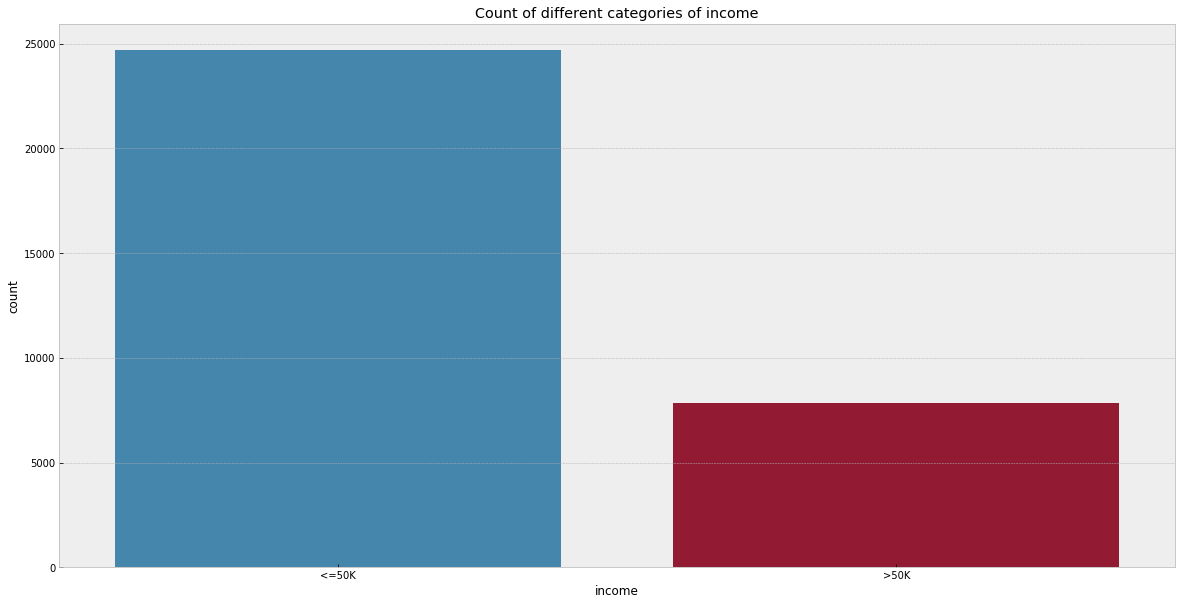

In [41]:
count_graph(["income"], final_df)

###### It is obvious from above figure that we have unbalanced class problem

In [42]:
final_df

,age,capital.gain,capital.loss,hours.per.week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,...,native.country_Hong,native.country_Hungary,native.country_India,native.country_Iran,native.country_Ireland,native.country_Italy,native.country_Jamaica,native.country_Japan,native.country_Laos,native.country_Mexico,native.country_Nicaragua,native.country_Outlying-US(Guam-USVI-etc),native.country_Peru,native.country_Philippines,native.country_Poland,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,0,4356,40,<=50K,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,82,0,4356,18,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,66,0,4356,40,<=50K,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,54,0,3900,40,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,41,0,3900,40,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,0,0,40,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,27,0,0,38,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32558,40,0,0,40,>50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32559,58,0,0,40,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [44]:
y = final_df["income"]
X = final_df.drop(["income"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

##### Train a RandomForestClassifier due to its robustness and feature importance readibility for our problem

In [45]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("Accuracy score: "+ str(metrics.accuracy_score(y_test, predictions)*100))

Accuracy score: 85.07523799774798


###### Refined evaluation metric to see the precision, recall, fscore, support for individual labels. Now, we can choose the best metric either, precision, recall or FScore based on the business requirements 

In [46]:
result = metrics.precision_recall_fscore_support(y_test, predictions, average=None, labels=["<=50K", ">50K"])
print("Label: " + str(['<=50K', '>50K']))
print("Precision: " + str(result[0]))
print("Recall: " + str(result[1]))
print("FScore: " + str(result[2]))
print("Support: " + str(result[3]))

Label: ['<=50K', '>50K']
Precision: [0.88466545 0.72592238]
Recall: [0.92236699 0.63098709]
FScore: [0.90312292 0.67513369]
Support: [7368 2401]


###### Averaging based on the weighted support to get an overall better evaluation result

In [47]:
result_weighted= metrics.precision_recall_fscore_support(y_test, predictions, average="weighted", labels=["<=50K", ">50K"])
print("Label: " + str(['<=50K', '>50K']))
print("Precision: " + str(result_weighted[0]))
print("Recall: " + str(result_weighted[1]))
print("FScore: " + str(result_weighted[2]))
print("Support: " + str(result_weighted[3]))

Label: ['<=50K', '>50K']
Precision: 0.8456499820270578
Recall: 0.8507523799774798
FScore: 0.8470883089672936
Support: None


###### Feature Importance for TOP_N_FEATURES (N can be specified) based on RandomForestClassifier result

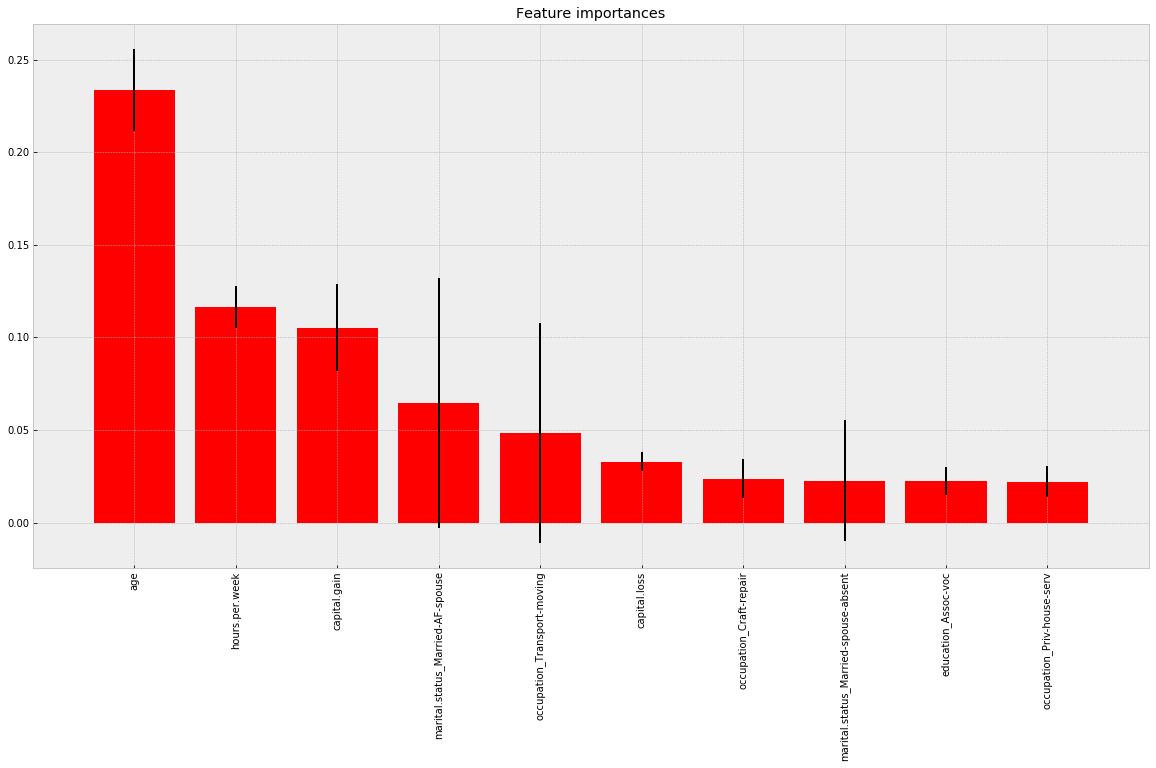

In [48]:
TOP_N_FEATURES = 10 
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(TOP_N_FEATURES), importances[indices][:TOP_N_FEATURES],
        color="r", yerr=std[indices][:TOP_N_FEATURES], align="center")
plt.xticks(range(TOP_N_FEATURES), list(final_df.columns[index] for index in indices), rotation=90)
plt.xlim([-1, TOP_N_FEATURES])
plt.show()

###### Saving the default random forest classifier model in a pickle file 

In [49]:
import pickle

In [50]:
filename= "default_rfmodel.pkl"
pickle.dump(model, open(filename,"wb"))

In [51]:
loaded_model=pickle.load(open(filename,"rb"))
result=loaded_model.score(X_test, y_test)
print(result)

0.8507523799774798


In [52]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from sklearn import ensemble
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing

In [53]:
n_estimators = [300, 400, 500, 600, 700]
max_depth = [25, 30, 40, 50, 60]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)


rf_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 15.5min finished


{'n_estimators': 300,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_depth': 60}

In [54]:
preds = rf_random.predict(X_test)
print("Accuracy score: "+ str(metrics.accuracy_score(y_test, preds)*100))

Accuracy score: 86.98945644385302


In [55]:
result_weighted= metrics.precision_recall_fscore_support(y_test, preds, average="weighted", labels=["<=50K", ">50K"])
print("Label: " + str(['<=50K', '>50K']))
print("Precision: " + str(result_weighted[0]))
print("Recall: " + str(result_weighted[1]))
print("FScore: " + str(result_weighted[2]))
print("Support: " + str(result_weighted[3]))

Label: ['<=50K', '>50K']
Precision: 0.8652827410112285
Recall: 0.8698945644385301
FScore: 0.8644047951788526
Support: None


In [58]:
filename= "finetuned_rfmodel.pkl"
pickle.dump(rf_random, open(filename,"wb"))

In [59]:
loaded_model=pickle.load(open(filename,"rb"))
result=loaded_model.score(X_test, y_test)
print(result)

0.8698945644385301


## Second Business problem

Data gathering 
 - Annotate images based on brands, product category, target category (type of customers) etc. - problem of multi-labeling https://github.com/tzutalin/labelImg

ML model
 - Data dependent problem so, we have multiple ideas outlined here. Two methods to extract relevant product information from images <br />
     <span style="color:red"> First, </span>
     - OCR model to read the contents from product, 
         * Library: Tesseract by Google
     - NLP to analyze and process the extracted contents, Part-of-Speech tagging (Noun, pronoun word etc.), 
         * Use exiting libraries like Spacy, NLTK, Word2Vec for Part-Of-Speech tagging, TextVectorization or can also define your own ML model based on the text to have better product information.
         * Library: Spacy, NLTK, <br />
         
 <span style="color:red"> Second, </span>
     - Image classifier like CNNs for predicting product type, e.g, shampoo, conditioner, lipstick etc., 
         * Transfer learning by fine-tuning existing state-of-the-art models like, VGG-19. Library: Tensorflow, 
         PyTorch <br />
         
   <span style="color:red"> Third, </span>      
     - Also it is possible to transform images into feature vectors to find similarity which showing the similar products in the visualization tool, this can be done using some exiting ML or computer vision techniques like WND-CHARM 
     - Constrastive learning to learn s

Human interaction, if needed
 - Take help of a professional to check if the labels are accurate and also, with marketing people to see if they approve 
 - Can discard, add or process the labels acquired by the ML model on new images. 

Visualization 
 - Heirarchial visualization. First choose brand name, then it's product category will show up. Secondly, we can choose a specific product or all the products and then, the images will be shown from our database.
 
 - Can show similar or recommended products based on clustering technique for visualizing a product using numerical representation of image and/or image text.